In [1]:
import os
import pandas as pd
import numpy as np
from moviepy.editor import VideoFileClip
import cv2


# env python 3.10

# Set plot parameters
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams['axes.grid'] = False
plt.style.use('dark_background')
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["font.size"] = 13

In [2]:
vid_filepath = "./data/videos/nepenthes-palmengarten/2024_0211_100603_004.MP4"
vid_filename = vid_filepath.split("/")[-1]

print(vid_filename)

2024_0211_100603_004.MP4


# Get FPS and RESOLUTION

In [3]:
clip = VideoFileClip(vid_filepath)
duration = clip.duration
resolution = clip.size
fps = clip.fps
clip.close()

print(duration, fps, resolution)

74.63 24.0 [2880, 2160]


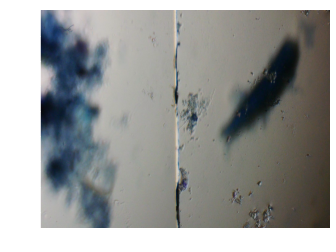

In [10]:
# show first frame with pixel values to get DIMENSIONS FOR CROPPING
video = cv2.VideoCapture(vid_filepath)
_, frame = video.read()
plt.imshow(frame)

In [29]:
from moviepy.editor import *

video = VideoFileClip(vid_filepath).subclip(10, 19)#.resize(600)  # , target_resolution=(600,600) VideoFileClip(vid_filepath).subclip(10, 12).crop(x=...)
#video.fx()
#from moviepy.video.fx.all import crop
video_crop = video.fx(vfx.crop, x1=1200, y1=200, y2=2000, width=600)
video_crop = video_crop.rotate(90)
video_crop = vfx.mirror_x(video_crop) # .fx(vfx.rotate(90))
#video.write_videofile("./data/samtrack-testing/moviepy_test_edited_h264_2sec.mp4", fps=fps, codec="libx264", audio=False)
#video.write_videofile("./data/samtrack-testing/moviepy_test_edited_2sec_crop200x200.mov", fps=fps, codec="libx264", audio=False)
#video_crop.write_videofile("./data/samtrack-testing/moviepy_test_edited_2sec_crop200x200.mov", fps=fps, codec="libx264", audio=False)
video_crop.write_videofile("./data/samtrack-testing/moviepy_test_edited_9sec_crop_rot.mp4", fps=fps, codec="libx264", audio=False)

t:  77%|███████▋  | 167/216 [00:15<00:03, 14.91it/s, now=None]

Moviepy - Building video ./data/samtrack-testing/moviepy_test_edited_9sec_crop_rot.mp4.
Moviepy - Writing video ./data/samtrack-testing/moviepy_test_edited_9sec_crop_rot.mp4



t:  77%|███████▋  | 167/216 [00:30<00:03, 14.91it/s, now=None]

Moviepy - Done !
Moviepy - video ready ./data/samtrack-testing/moviepy_test_edited_9sec_crop_rot.mp4


# Video format to mpv4

In [ ]:
video = cv2.VideoCapture(vid_filepath)

# CODEC
codecs = ["mp4v", "h264"]  # h264 is something else
#fourcc = cv2.VideoWriter_fourcc(*"mp4v")
#fourcc = cv2.VideoWriter_fourcc(*"divx")
fourcc = cv2.VideoWriter_fourcc(*"h264")

out = cv2.VideoWriter("./data/samtrack-testing/cv2_out_test_h264codec.mp4", fourcc, fps, resolution)
counter = 0 
while True:
    counter += 1
    ret, frame = video.read()
    if counter == 50:
        break
    out.write(frame)

out.release()
video.release()


# Frame extraction

In [ ]:
fpath = f"/Users/mikehemberger/Documents/vscode/rotifer-locomotion/data/videos/pond-water-rotifers/{file_name}"
os.makedirs(f'/Users/mikehemberger/Documents/vscode/rotifer-locomotion/data/images/{file_name[:-4]}/', exist_ok=True)
video = cv2.VideoCapture(fpath)
frame_counter = 0

while True:
    ret, frame = video.read()
    if not ret:
        break
    if frame_counter % 1 == 0:
        cv2.imwrite(f'/Users/mikehemberger/Documents/vscode/rotifer-locomotion/data/images/{file_name[:-4]}/frame{str(frame_counter).zfill(4)}.jpg', frame)  
    frame_counter += 1
video.release()
